In [126]:
# Load libraries
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sk 
import seaborn as sn
import matplotlib.pyplot as plt
from numpy import NaN
from sklearn.datasets import load_iris

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from collections import Counter

In [43]:
# Load dataset
url = "https://raw.githubusercontent.com/manoharpavuluri/iris-flower-analysis/master/datasets_19_420_Iris.csv"
df = pd.read_csv(url,
    index_col=0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
#function to get all info in one go
def full_info(df):
    df_column=[]
    df_dtype=[]
    df_null=[]
    df_nullc=[]
    df_mean=[]
    df_median=[]
    df_std=[]
    df_min=[]
    df_max=[]
    df_uniq=[]
    df_count=[]
    for col in df.columns: 
        df_column.append(  col )
        df_dtype.append( df[col].dtype)
        df_null.append( round(100 * df[col].isnull().sum(axis=0)/len(df[col]),2))
        df_nullc.append( df[col].isnull().sum(axis=0))
        df_uniq.append( df[col].nunique()) if df[col].dtype == 'object' else df_uniq.append( NaN)
        df_mean.append(  '{0:.2f}'.format(df[col].mean())) if df[col].dtype == 'int64' or df[col].dtype == 'float64' else df_mean.append( NaN)
        df_median.append( '{0:.2f}'.format(df[col].median())) if df[col].dtype == 'int64' or df[col].dtype == 'float64' else df_median.append( NaN)
        df_std.append( '{0:.2f}'.format(df[col].std())) if df[col].dtype == 'int64' or df[col].dtype == 'float64' else df_std.append( NaN)
        df_max.append( '{0:.2f}'.format(df[col].max())) if df[col].dtype == 'int64' or df[col].dtype == 'float64' else df_max.append( NaN)
        df_min.append( '{0:.2f}'.format(df[col].min())) if df[col].dtype == 'int64' or df[col].dtype == 'float64' else df_min.append( NaN)
        df_count.append(df[col].count())
    return pd.DataFrame(data = {'ColName':  df_column, 'ColType': df_dtype, 'NullCnt': df_nullc, 'NullCntPrcntg': df_null,  'Min': df_min, 'Max': df_max, 'Mean': df_mean, 'Med': df_median, 'Std': df_std, 'UniqCnt': df_uniq, 'ColValCnt': df_count})

In [25]:
# lets get full desciption of the data
full_info(df)

,ColName,ColType,NullCnt,NullCntPrcntg,Min,Max,Mean,Med,Std,UniqCnt,ColValCnt
0,SepalLengthCm,float64,0,0.0,4.30,7.90,5.84,5.80,0.83,NaN,150
1,SepalWidthCm,float64,0,0.0,2.00,4.40,3.05,3.00,0.43,NaN,150
2,PetalLengthCm,float64,0,0.0,1.00,6.90,3.76,4.35,1.76,NaN,150
3,PetalWidthCm,float64,0,0.0,0.10,2.50,1.20,1.30,0.76,NaN,150
4,Species,object,0,0.0,NaN,NaN,NaN,NaN,NaN,3.0,150


No NUlls, perfectly distributed observations for each feature

In [27]:
# class distribution
print(df.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


Not a huge dataset but has equal number for each label

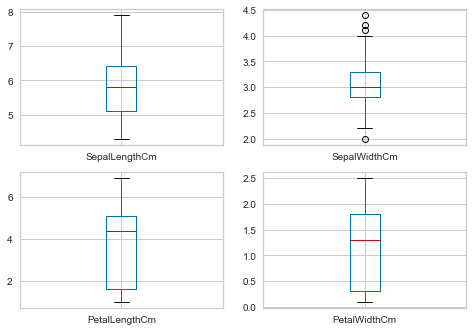

In [44]:
# box and whisker plots
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

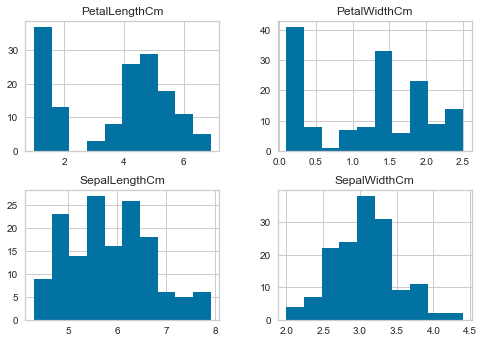

In [45]:
# histograms
df.hist()
pyplot.show()

In [87]:
# Split-out validation dataset
X = df.drop(columns='Species')
y = df['Species']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X.shape)
print(y.shape)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(150, 4)
(150,)
(120, 4)
(120,)
(30, 4)
(30,)


In [59]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [60]:
y.head()

Id
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
Name: Species, dtype: object

In [130]:
# Check multiple Algorithms to see which one has better outcome.
models = []
models.append(('LogReg', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LnrDisAnal', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DecTreeClass', DecisionTreeClassifier()))
models.append(('GausNB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)

    print( "\033[1m" + name + "\033[0m")
    accuracy = accuracy_score(Y_test,y_pred)
    print('Accuracy: %.2f%%' % (accuracy*100.0))
    results.append(cv_results)
    names.append(name)
    print('Cross Validation Results Mean: %f ' % cv_results.mean())
    print('Cross Validation Results STD: %f' % cv_results.std())

LogReg
Accuracy: 83.33%
Cross Validation Results Mean: 0.941667 
Cross Validation Results STD: 0.065085
LnrDisAnal
Accuracy: 100.00%
Cross Validation Results Mean: 0.975000 
Cross Validation Results STD: 0.038188
KNN
Accuracy: 100.00%
Cross Validation Results Mean: 0.958333 
Cross Validation Results STD: 0.041667
DecTreeClass
Accuracy: 96.67%
Cross Validation Results Mean: 0.933333 
Cross Validation Results STD: 0.050000
GausNB
Accuracy: 96.67%
Cross Validation Results Mean: 0.950000 
Cross Validation Results STD: 0.055277
SVM
Accuracy: 96.67%
Cross Validation Results Mean: 0.983333 
Cross Validation Results STD: 0.033333
XGB
Accuracy: 96.67%
Cross Validation Results Mean: 0.958333 
Cross Validation Results STD: 0.041667


Based on Accuracy Score and Cross validation Score, LDA is our goto model. 

In the next iteration, lets focus on LDA

In [134]:
# Make predictions on validation dataset using LDA
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

In [135]:
# Evaluate predictions
cm = confusion_matrix(Y_test, predictions)
print(classification_report(Y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



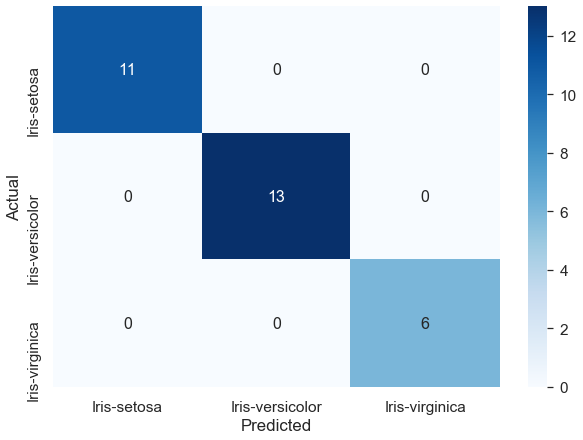

In [136]:
# lets visualize the confusion matrix that evaluates our Predicted vs Actual
df_cm = pd.DataFrame(cm, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# 